# Sujet 2 : le pouvoir d'achat des ouvriers anglais du XVIe au XIXe siècle

William Playfair était un des pionniers de la présentation graphique des données. Il est notamment considéré comme l'inventeur de l'histogramme. Un de ses graphes célèbres, tiré de son livre "A Letter on Our Agricultural Distresses, Their Causes and Remedies", montre l'évolution du prix du blé et du salaire moyen entre 1565 et 1821. Playfair n'a pas publié les données numériques brutes qu'il a utilisées, car à son époque la réplicabilité n'était pas encore considérée comme essentielle. Des valeurs obtenues par numérisation du graphe sont aujourd'hui téléchargeables, la version en [format CSV](https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv) étant la plus pratique.

Quelques remarques pour la compréhension des données :
- Jusqu'en 1971, la livre sterling était divisée en 20 shillings, et un shilling en 12 pences.
- Le prix du blé est donné en shillings pour un quart de boisseau de blé. Un quart de boisseau équivaut 15 livres britanniques ou 6,8 kg.
- Les salaires sont donnés en shillings par semaine.

## Mission 0 : preparer les données

Le document csv est téléchargé et est enregistré localement.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

data_url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv"

data_file = "Wheat.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)
    

raw_data = pd.read_csv(data_file)
raw_data


Unnamed: 0  Year  Wheat  Wages
0            1  1565   41.0   5.00
1            2  1570   45.0   5.05
2            3  1575   42.0   5.08
3            4  1580   49.0   5.12
4            5  1585   41.5   5.15
5            6  1590   47.0   5.25
6            7  1595   64.0   5.54
7            8  1600   27.0   5.61
8            9  1605   33.0   5.69
9           10  1610   32.0   5.78
10          11  1615   33.0   5.94
11          12  1620   35.0   6.01
12          13  1625   33.0   6.12
13          14  1630   45.0   6.22
14          15  1635   33.0   6.30
15          16  1640   39.0   6.37
16          17  1645   53.0   6.45
17          18  1650   42.0   6.50
18          19  1655   40.5   6.60
19          20  1660   46.5   6.75
20          21  1665   32.0   6.80
21          22  1670   37.0   6.90
22          23  1675   43.0   7.00
23          24  1680   35.0   7.30
24          25  1685   27.0   7.60
25          26  1690   40.0   8.00
26          27  1695   50.0   8.50
27          28  1700   30.0   9.00
28          29  1705   32.0  10.00
29          30  1710   44.0  11.00
30          31  1715   33.0  11.75
31          32  1720   29.0  12.50
32          33  1725   39.0  13.00
33          34  1730   26.0  13.30
34          35  1735   32.0  13.60
35          36  1740   27.0  14.00
36          37  1745   27.5  14.50
37          38  1750   31.0  15.00
38          39  1755   35.5  15.70
39          40  1760   31.0  16.50
40          41  1765   43.0  17.60
41          42  1770   47.0  18.50
42          43  1775   44.0  19.50
43          44  1780   46.0  21.00
44          45  1785   42.0  23.00
45          46  1790   47.5  25.50
46          47  1795   76.0  27.50
47          48  1800   79.0  28.50
48          49  1805   81.0  29.50
49          50  1810   99.0  30.00
50          51  1815   78.0    NaN
51          52  1820   54.0    NaN
52          53  1821   54.0    NaN

Vérifications qu'il n'existe aucune donnée vide.

In [3]:
raw_data[raw_data.isnull().any(axis=1)]

Unnamed: 0  Year  Wheat  Wages
50          51  1815   78.0    NaN
51          52  1820   54.0    NaN
52          53  1821   54.0    NaN

Il existe des données vides.
Suppression des lignes contenant des données inexistantes (année 1815, 1820, 1821)

In [4]:
data = raw_data.dropna().copy()
data

Unnamed: 0  Year  Wheat  Wages
0            1  1565   41.0   5.00
1            2  1570   45.0   5.05
2            3  1575   42.0   5.08
3            4  1580   49.0   5.12
4            5  1585   41.5   5.15
5            6  1590   47.0   5.25
6            7  1595   64.0   5.54
7            8  1600   27.0   5.61
8            9  1605   33.0   5.69
9           10  1610   32.0   5.78
10          11  1615   33.0   5.94
11          12  1620   35.0   6.01
12          13  1625   33.0   6.12
13          14  1630   45.0   6.22
14          15  1635   33.0   6.30
15          16  1640   39.0   6.37
16          17  1645   53.0   6.45
17          18  1650   42.0   6.50
18          19  1655   40.5   6.60
19          20  1660   46.5   6.75
20          21  1665   32.0   6.80
21          22  1670   37.0   6.90
22          23  1675   43.0   7.00
23          24  1680   35.0   7.30
24          25  1685   27.0   7.60
25          26  1690   40.0   8.00
26          27  1695   50.0   8.50
27          28  1700   30.0   9.00
28          29  1705   32.0  10.00
29          30  1710   44.0  11.00
30          31  1715   33.0  11.75
31          32  1720   29.0  12.50
32          33  1725   39.0  13.00
33          34  1730   26.0  13.30
34          35  1735   32.0  13.60
35          36  1740   27.0  14.00
36          37  1745   27.5  14.50
37          38  1750   31.0  15.00
38          39  1755   35.5  15.70
39          40  1760   31.0  16.50
40          41  1765   43.0  17.60
41          42  1770   47.0  18.50
42          43  1775   44.0  19.50
43          44  1780   46.0  21.00
44          45  1785   42.0  23.00
45          46  1790   47.5  25.50
46          47  1795   76.0  27.50
47          48  1800   79.0  28.50
48          49  1805   81.0  29.50
49          50  1810   99.0  30.00

## mission 1 : Reproduire le graphe de Playfair à partir des données numériques.
1. Représentez, comme Playfair, le prix du blé par des barres
2. Représentez, comme Playfair, les salaires par une surface bleue délimitée par une courbe rouge. 
3. Superposez les deux de la même façon dans un seul graphique. Le style de votre graphique pourra rester différent par rapport à l'original, mais l'impression globale devrait être la même.

### Représentation du prix du blé par des barres.

Text(0.5,0,'Year')

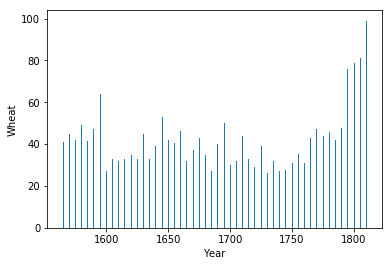

In [5]:
plt.bar( data['Year'],data['Wheat'] )
plt.ylabel('Wheat')
plt.xlabel('Year')

###  Représentation des salaires par une surface bleue délimitée par une courbe rouge

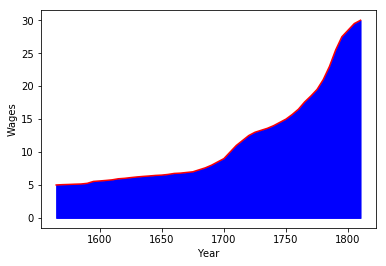

In [6]:
plt.plot( data['Year'],data['Wages'], 'r-')
plt.fill_between(data['Year'],data['Wages'], color='blue')

plt.ylabel('Wages')
plt.xlabel('Year')

plt.show()


### Superposition des deux dans un seul graphique

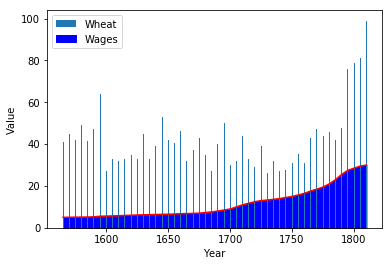

In [7]:
p1 = plt.bar( data['Year'],data['Wheat'] )

p2 = plt.plot( data['Year'],data['Wages'], 'r-')
p2 = plt.fill_between(data['Year'],data['Wages'], color='blue')

plt.ylabel('Value')
plt.xlabel('Year')
plt.legend([p1, p2], ["Wheat", "Wages"])
plt.show()

## Mission 2 : Améliorez la présentation de ces données

Pour commencer, Playfair a combiné les deux quantités dans un même graphique en simplifiant les unités "shillings par quart de boisseau de blé" et "shillings par semaine" à un simple "shillings", ce qui aujourd'hui n'est plus admissible. 

Utilisez deux ordonnées différentes, une à gauche et une à droite, et indiquez les unités correctes. À cette occasion, n'hésitez pas à proposer d'autres représentations que des barres et des surface/courbes pour les deux jeux de données si ceci vous paraît judicieux.

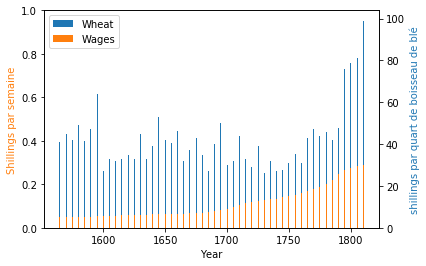

In [8]:
fig, ax1 = plt.subplots()
color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('Shillings par semaine', color=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('shillings par quart de boisseau de blé', color=color)

p1 = plt.bar( data['Year'],data['Wheat'] )

p2 = plt.bar( data['Year'],data['Wages'])


plt.legend([p1, p2], ["Wheat", "Wages"])
plt.show()


## Mission 3 : Pouvoir d'achat

L'objectif de Playfair était de montrer que le pouvoir d'achat des ouvriers avait augmenté au cours du temps. 
Essayez de mieux faire ressortir cette information. 

1. Faites une représentation graphique du pouvoir d'achat au cours du temps, définie comme la quantité de blé qu'un ouvrier peut acheter avec son salaire hebdomadaire.

2. Dans un autre graphique, montrez les deux quantités (prix du blé, salaire) sur deux axes différents, sans l'axe du temps.Trouvez une autre façon d'indiquer la progression du temps dans ce graphique.

3. Quelle représentation des données vous paraît la plus claire ?


### Représentation graphique du pouvoir d'achat au cours du temps

Le pouvoir d'achat est définie comme la quantité de blé qu'un ouvrier peut acheter avec son salaire hebdomadaire.

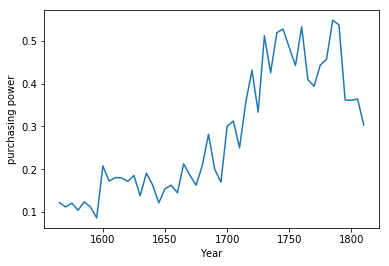

In [22]:
purchasingPower = data['Wages']/data['Wheat']
plt.plot( data['Year'],purchasingPower)

plt.ylabel('purchasing power')
plt.xlabel('Year')

plt.show()

### Représentation des deux quantités (prix du blé, salaire) sur deux axes différents
Le prix du blé est sur l'axe y. Le salaire est le temps sont sur l'axe x (Salaire en haut et temps en bas).

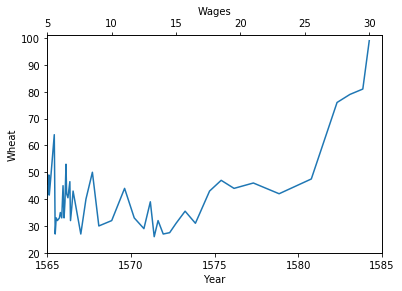

In [122]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Year')
plt.xticks([0,1,2,3,4], data['Year'])
ax1.set_ylabel('Wheat')

ax2 = ax1.twiny()
ax2.set_xlabel('Wages')

p1 = plt.plot(data['Wages'], data['Wheat'] )
plt.axis([5,31,20,101])
plt.show()

### Quelle représentation des données vous paraît la plus claire ?
La représentation qui me parait la plus claire reste celle inspiré de Playfair (ci-dessous).

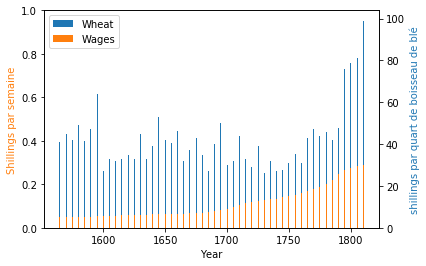

In [123]:
fig, ax1 = plt.subplots()
color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('Shillings par semaine', color=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('shillings par quart de boisseau de blé', color=color)

p1 = plt.bar( data['Year'],data['Wheat'] )

p2 = plt.bar( data['Year'],data['Wages'])


plt.legend([p1, p2], ["Wheat", "Wages"])
plt.show()
